# INF8111 - Fouille de données / Data Mining
## Automne 2020 - TP3 - Fouille de réseaux sociaux / Mining of social networks
### Membres de l'équipe / Team members
    - Elaa Mokhtari (2345005)
    - Marc Jodel Dumesle Alcindor (2000081)
    - Mariem Ben Jaber (2082688)

#### Numéro du groupe :
    - TP - Groupe 1

## Instructions de remise / Submission

Vous devez remettre dans la boîte de remise sur moodle ce fichier nommé TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Assurez-vous que tous les résultats soient lisibles lorsque le notebook est ouvert.

Tout devra être remis avant le **21 juin 2025 à 23h55**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour ouvrable de retard.

## Barème

Le total est de 14 points.


---

## Submission

You must put back in the submission box on moodle this file renamed TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Make sure that all results are there when you open your notebook.

Everything must be submitted before **June 21th 2025 à 23h55**. Any late work will be penalized with a value of 10% per open day of delay.

## Barème

The total is 14 points.


## Réseaux sociaux / Social Networks
Les réseaux sociaux occupent une grande partie de la vie humaine. Chaque personne appartient tout le long de sa vie à différentes communautés. Avec le rassemblage de ces informations sur les différentes plateformes en ligne de réseaux sociaux, les analystes de données ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec plusieurs impacts sur plusieurs aspects tels que la publicité et les systèmes de recommandation.

### But
Le but de ce TP est de vous donner un aperçu de l'analyse d'un réseau social.

Vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Nous vous fournissons les CSV contenant les réseaux sociaux à analyser.


---

## Social networks
Social networks are a major component of the human life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

You will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

We provide you with the CSV containing the social networks to be analysed.

# 1. LPAm+ (14 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour rassembler les personnes dans des communautés selon les liens entre eux.

## LPAm+
Dans cette partie, vous implémenterez l'algorithme LPAm+ pour détecter les communautés parmi les personnages de Games of Thrones. Vous devez utiliser les CSV *nodes* et *edges* pour cela.

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut combiner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'elle peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du TP.

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser le package networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

# 1. LPAm+ (14 points)


## Community detection
Community detection in a social network is a frequent manipulation when analysing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of Games of Thrones. You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details, but you do not need to, as you will be guided throughout the TP.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [152]:
# vous pouvez bien sûr utiliser anaconda pour installer les packages
!pip install --user numpy
!pip install --user pandas
!pip install --user matplotlib
!pip install --user networkx
!pip install --user scipy

In [153]:
import numpy as np
import networkx as nx
import random
import itertools
import math

random.seed(42)
np.random.seed(42)

class LPAmPlus:
    """
    Contructor
    """

    def __init__(self, graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """
        self.graph = graph


        """
        Assign a label to each node
        """
        #TODO

        for i, node in enumerate(self.graph.nodes()):
          self.graph.nodes[node]["label"] = i


        """
        labels gives all the communities present in the network
        """
        self.labels = None



    """
    Term to optimize when replacing labels
    """

    def label_evaluation(self, current_node, new_label):
        #TODO

        neighbors = self.graph.neighbors(current_node)
        score = 0
        for neighbor in neighbors:
          if self.graph.nodes[neighbor]["label"] == new_label:
            score += 1
        return score

    """
    Function to choose the new label for a node
    """

    def update_label(self, current_node):
        #TODO

      neighbor_labels = [self.graph.nodes[n]["label"] for n in self.graph.neighbors(current_node)]
      if not neighbor_labels:
          return False
      best_score = -1
      best_label = self.graph.nodes[current_node]["label"]

      for label in set(neighbor_labels):
          score = self.label_evaluation(current_node, label)
          if score > best_score:
              best_score = score
              best_label = label

      if best_label != self.graph.nodes[current_node]["label"]:
          self.graph.nodes[current_node]["label"] = best_label
          return True
      return False

    """
    Function that calculates the current modularity of the network
    """

    def modularity(self):
        #TODO

      labels = []
      old_labels = []
      for node in self.graph.nodes():
          label = self.graph.nodes[node]["label"]
          if label not in old_labels:
              old_labels.append(label)
              labels.append([node])
          else:
              index = old_labels.index(label)
              labels[index].append(node)
      return nx.algorithms.community.quality.modularity(self.graph, labels)


    """
    Function that applies the LPAm algorithm on the network
    """

    def LPAm(self):
        #TODO

      new = True
      while new:
          new = False
          nodes = list(self.graph.nodes())
          random.shuffle(nodes)

          for node in nodes:
              current_label = self.graph.nodes[node]["label"]
              best_label = current_label
              best_modularity = self.modularity()

              # On teste tous les labels des voisinss
              neighbor_labels = set(
                  self.graph.nodes[neighbor]["label"]
                  for neighbor in self.graph.neighbors(node)
              )
              for label in neighbor_labels:
                  self.graph.nodes[node]["label"] = label
                  mod = self.modularity()
                  if mod > best_modularity:
                      best_label = label
                      best_modularity = mod

              self.graph.nodes[node]["label"] = best_label
              if best_label != current_label:
                  new = True
          self.labels = list(set(nx.get_node_attributes(self.graph, "label").values()))

    """
    Function that find which communities to combine and combine them
    """
    def merge_communities(self):
        #TODO

        best_modularity = self.modularity()
        best_found = None

        original_labels = {node: self.graph.nodes[node]["label"] for node in self.graph.nodes()}

        for l1, l2 in itertools.combinations(self.labels, 2):
            for node in self.graph.nodes():
                if self.graph.nodes[node]["label"] == l2:
                    self.graph.nodes[node]["label"] = l1

            new_modularity = self.modularity()
            for node, label in original_labels.items():
                self.graph.nodes[node]["label"] = label

            if new_modularity > best_modularity:
                best_modularity = new_modularity
                best_found = (l1, l2)

        if best_found:
            l1, l2 = best_found
            for node in self.graph.nodes():
                if self.graph.nodes[node]["label"] == l2:
                    self.graph.nodes[node]["label"] = l1
            self.labels = list(set(nx.get_node_attributes(self.graph, "label").values()))
            return True
        return False


    """
    Function that applies the LPAm+ algorithm on the network
    """

    def find_communities(self):
        #TODO

        self.LPAm()
        improved = True
        while improved:
          improved = self.merge_communities()




### 1.1 Dataset (1 point)

Nous vous avons fourni les CSV pour toutes les saisons de Games of Thrones. Vous devez maintenant représenter ces réseaux en utilisant les deux CSV fournis pour chaque saison: un pour les sommets et un pour les arêtes.


#### Implémentation
1. Implémentez  la fonction  *`load_unweighted_network`*. Cette fonction retourne le réseau non dirigé et sans poids.

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un petit toy dataset. Vous devriez avoir quelque chose de similaire (data/picture.png):
![title](data/picture.png)


---
We have provided you with the csv for all the seasons of Games of Thrones. You must now represent each of those networks in code using two csv for each season: the one for the nodes and the one for the edges.


#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.

Use the function `test_load` to verify your implementation of the function. This test use a toy dataset. You should obtain a result similar to this (data/picture.png):
![title](data/picture.png)


In [154]:
import csv
import pandas as pd
import networkx as nx


def load_unweighted_network(node_csv, edge_csv):
    #TODO

    G = nx.Graph()
    nodes_df = pd.read_csv(node_csv)
    for _, row in nodes_df.iterrows():
        G.add_node(row["Id"])
        if "Community" in row:
            G.nodes[row["Id"]]["ground_truth"] = row["Community"]
    edges_df = pd.read_csv(edge_csv)
    for _, row in edges_df.iterrows():
        G.add_edge(row["Source"], row["Target"])

    return G

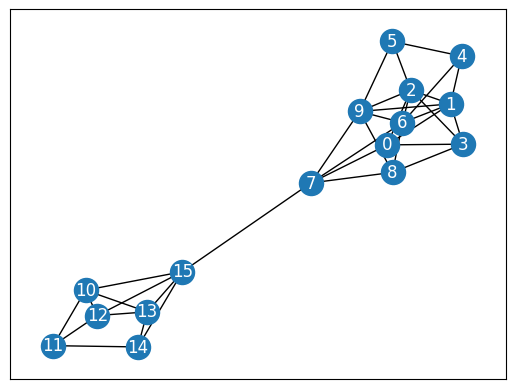

In [156]:
import matplotlib.pyplot as plt
def test_load():
    network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    nx.draw_networkx(network,font_color='white')
    plt.show()

test_load()

### 1.2  Modularité / Modularity (2 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$

- m: le nombre d'arêtes
- l: l'étiquette du sommet
- u, v: des sommets dans le réseau
- B: la matrice de modularité où chaque élément vaut $A_{uv} - P_{uv}$
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `nx.linalg.modularity_matrix` de networkx pour calculer la matrice B. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les nodes agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.413.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `nx.linalg.modularity_matrix` from networkx to calculate B. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.413.

In [157]:
def test_modularity():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in range(0, 16):
        lpam.graph.nodes[i]['label'] = 0 if i < 10 else 1
    print("Modularity: {:.3f}".format(lpam.modularity()))

test_modularity()

Modularity: 0.413


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (3 point)

Comme mentionné plus haut, l'algorithme est fortement basé sur son optimisation de la modularité. Il vous est maintenant demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme donne la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction choisit la nouvelle étiquette pour le sommet actuel. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label.

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et change leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimun de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe dans la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.399 avec 4 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.399 with 4 communities.

In [158]:
def test_lpam():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam()

Modularity: 0.399
Communities: [2, 3, 4, 12]


### 1.5 LPAm+ (3 point)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va reessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne peut plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction regarde si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.413 et 2 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.413 and 2 communities.

In [159]:
def test_lpam_plus():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam_plus()

Modularity: 0.413
Communities: [0, 11]


### 1.6 GOT dataset (3 points)

Rouler votre algorithme sur les données de Games of Thrones de chaque saison et comparer ce que vous obtenez et les vraies communautés. Le ground truth se trouve dans la colonne Community des csv. Des liens sont présents entre des personnages lorsque:
- Personnage A parle directement après Personnage B
- Personnage A parle de Personnage B
- Personnage C parle de Personnage A et Personnage B
- Personnage A et Personnage B font une action ensemble dans une scène (ex: quittent les lieux, A regarde B, sont assis à une table, etc)
- Personnage A et Personnage B apparaissent ensemble dans une scène

Commencez par calculer le RI (Rand index) de vos résultats. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: le nombre de sommets
- TP: True positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats et dans le ground truth
- TN: True négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans le ground truth
- FP: False positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans le ground truth
- FN: False négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes alors qu'ils sont dans la même communauté dans le ground truth


**N.B**: Ce n'est pas le nom des communautés que vous avez trouvé qui importante mais leur composition. Autrement dit, un TP est si le sommet a et le sommet b se trouve dans la même communauté dans vos résultats et dans le ground truth.


Répondez aux questions suivantes. Elles servent comme piste de réflexion pour votre analyse.

- L'algorithme performe-t-il bien sur toutes les saisons ou pour certaines seulement?
- Expliquez pourquoi vous avez obtenu ces résultats en analysant la formation des communautés dans chaque saison. Quelles particularités favorisent des bons résultats? Quelles particularités nuisent à l'algorithme?

Vous pouvez faire les manipulations que vous voulez pour mieux présenter vos résultats et mieux appuyer vos affirmations.

---

Run your algorithm over the Games of Thrones data from each season and compare what you get and the real communities. The ground truth is found in the Community column in the csv. Links are found between characters A and B when:
- Character A talks directly after Character B
- Character A talks about Character B
- Character C talks about Character B and A
- Character A and Character B does an action together in a scene (ex: leave the room, A looks toward B, are seated together at a table, etc)
- Character A and Character B are both present in a scene

Start by calculating the RI (Rand index) of your results. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well on all seasons or for some only?
- Explain why you obtained those results by analysing the communities from each season. Which particularities offer better results? Which hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.

#### Résultats / Results

------------------------------------------------------------------Season 1---------------------------------------------------------------- 

Modularity:  0.4520605439265298
Communities:  ['Lannister', 'Night Watch', "King's Landing", 'Stark', 'Dothraki', 'Doomed Night Watch', 'Orphan']
TP:  1357 TN:  5888 FP:  338 FN:  292
Rand Index (RI):  0.92
Precision:  0.800589970501475
Recall:  0.8229229836264402


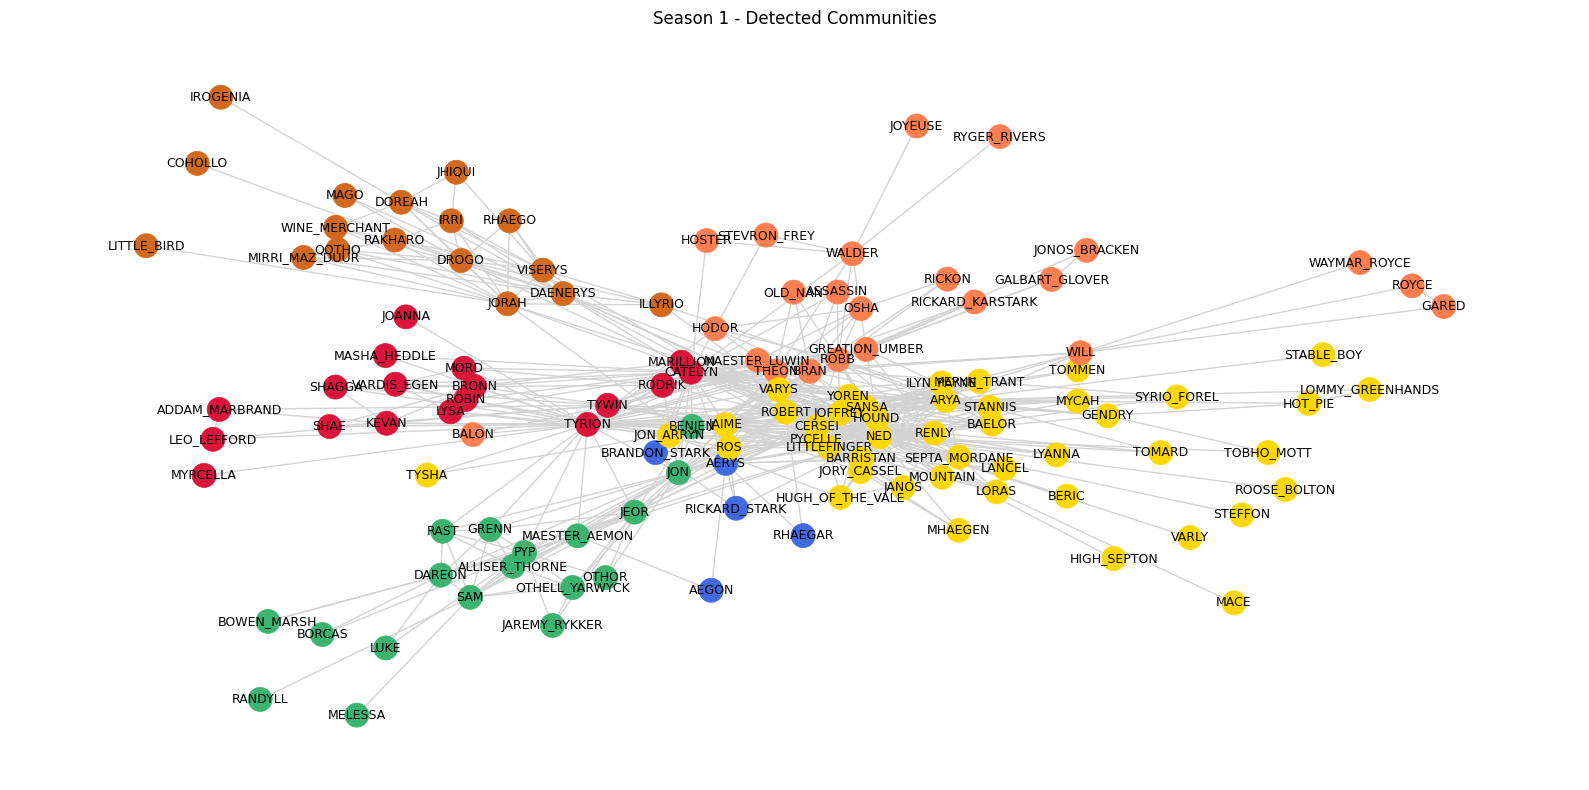



------------------------------------------------------------------Season 2---------------------------------------------------------------- 

Modularity:  0.5687818591339396
Communities:  ['Harenhall', 'Riverlands and Stormlands', 'Iron Islands and Winterfell', "King's Landing", 'Far North', 'Red Waste and Qarth', 'Janos']
TP:  1352 TN:  6647 FP:  140 FN:  117
Rand Index (RI):  0.9688711240310077
Precision:  0.9061662198391421
Recall:  0.9203539823008849


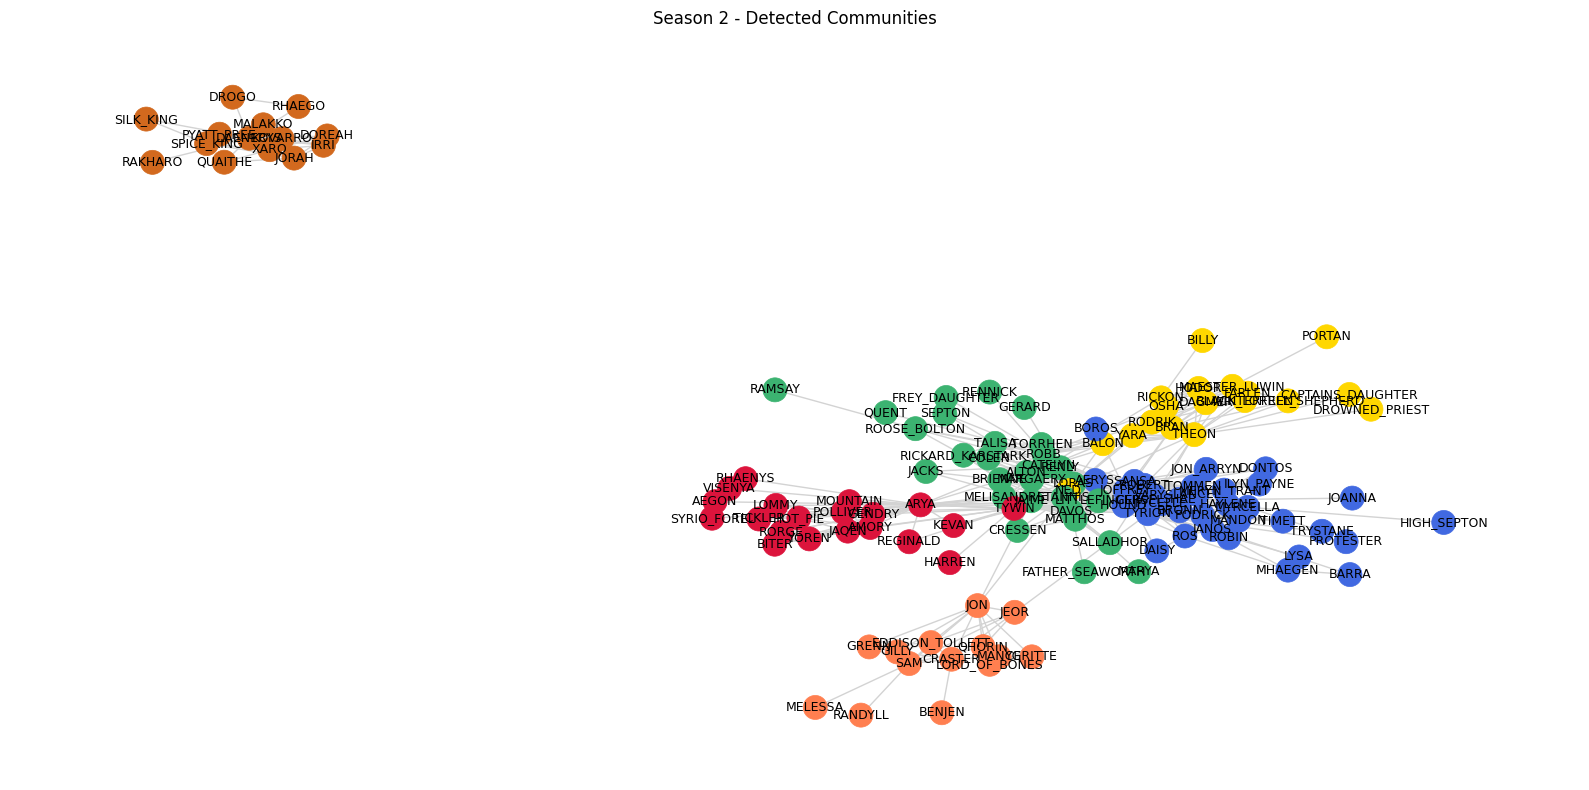



------------------------------------------------------------------Season 3---------------------------------------------------------------- 

Modularity:  0.6257341153315026
Communities:  ['Dragonstone', "Kingslayer's trek", "Craster's keep", "Theon's imprisonment", 'Accross the Narrow Sea', 'Stark Bannermen', "King's Landing", 'The North', 'Beyond the Wall']
TP:  987 TN:  6095 FP:  393 FN:  28
Rand Index (RI):  0.9438891110222578
Precision:  0.7152173913043478
Recall:  0.9724137931034482


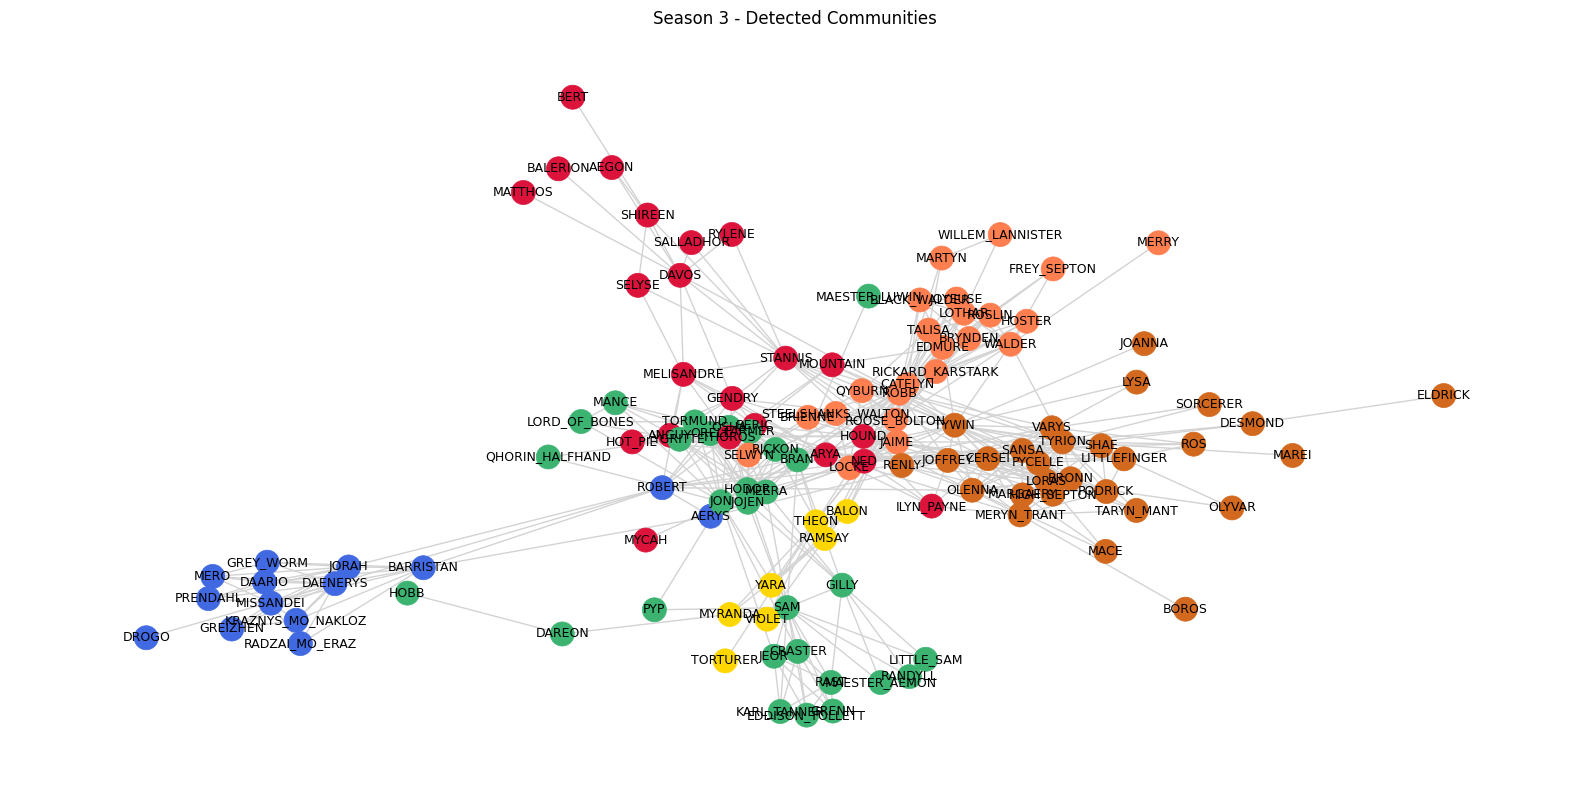



------------------------------------------------------------------Season 4---------------------------------------------------------------- 

Modularity:  0.6030151773395017
Communities:  ['Winterfell', "King's Landing", 'Castle Black', 'Eyrie', 'Riverlands', 'Dragonstone', 'Dwarf Troup', 'Meereen', 'Beyond the wall']
TP:  1905 TN:  11466 FP:  871 FN:  293
Rand Index (RI):  0.9199174406604748
Precision:  0.6862391930835735
Recall:  0.8666969972702456


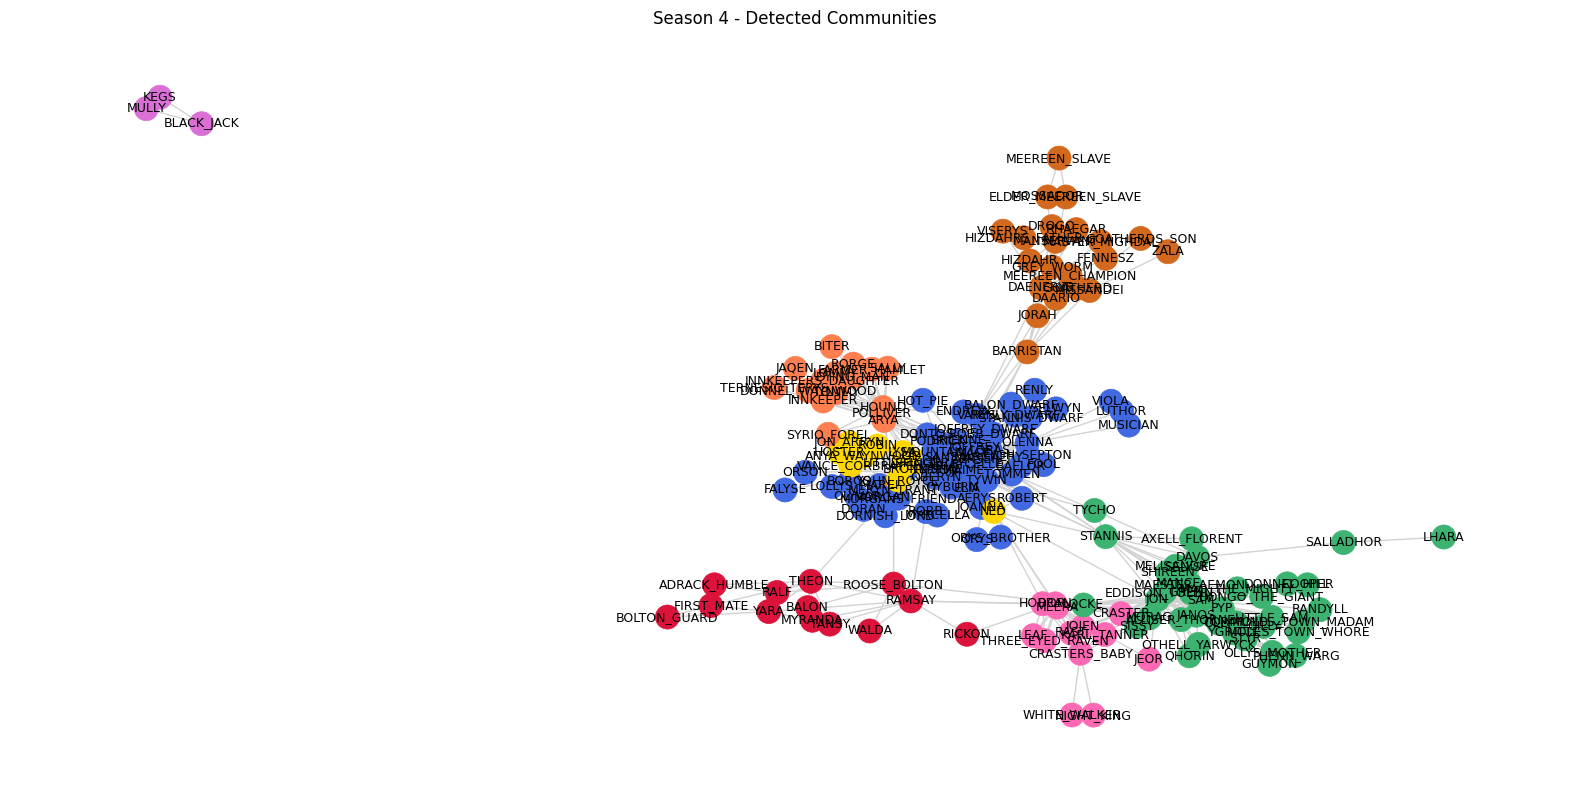



------------------------------------------------------------------Season 5---------------------------------------------------------------- 

Modularity:  0.6701165697377818
Communities:  ["Night's Watch", 'Essos', 'Dorne', 'Braavos', 'Winterfell', "King's Landing"]
TP:  1263 TN:  5623 FP:  41 FN:  94
Rand Index (RI):  0.9807719698048711
Precision:  0.968558282208589
Recall:  0.9307295504789977


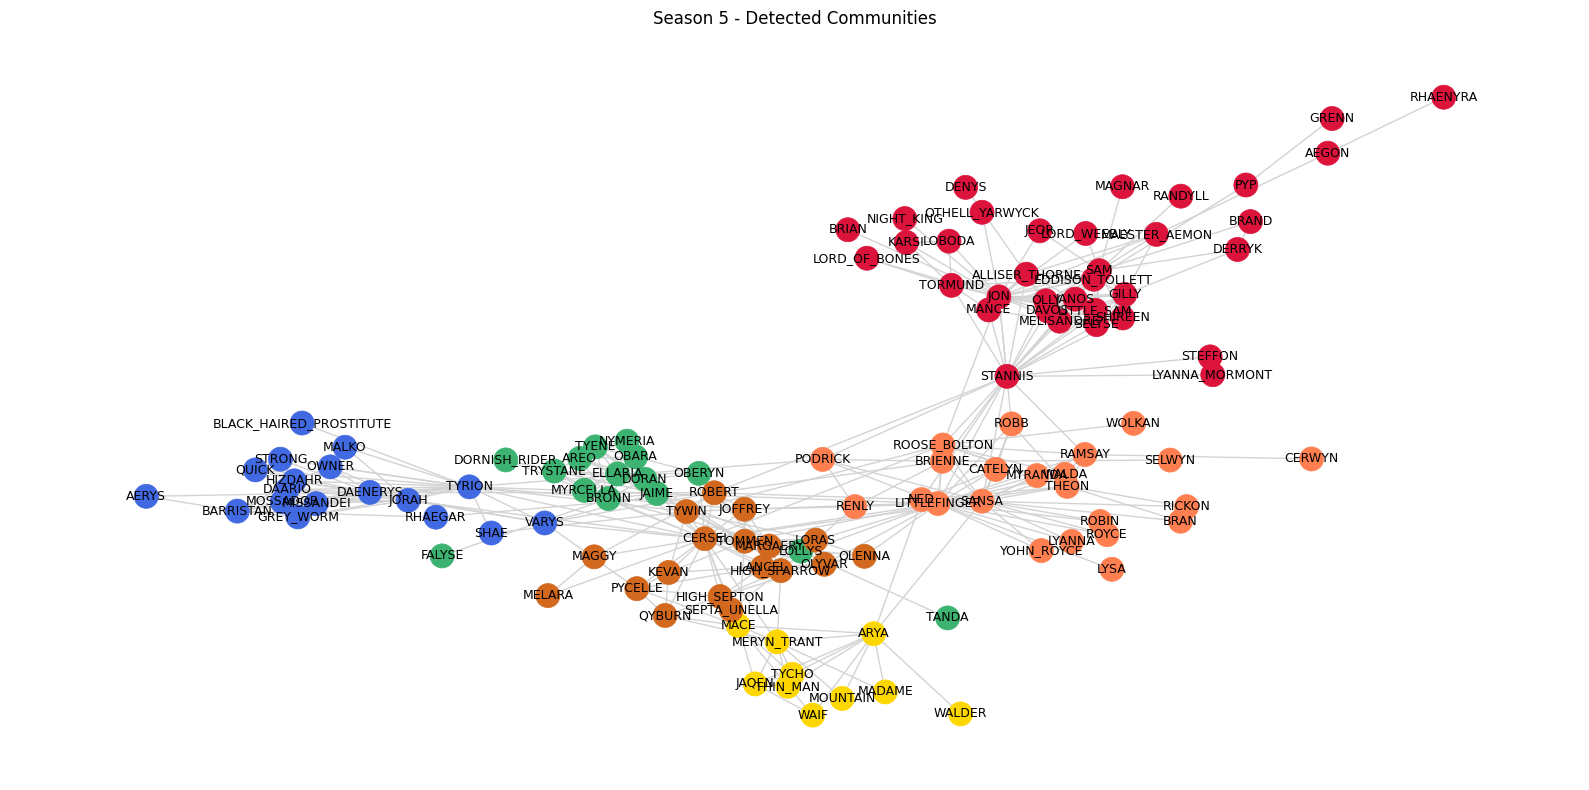



------------------------------------------------------------------Season 6---------------------------------------------------------------- 

Modularity:  0.6503941150945912
Communities:  ['Ironborn', 'Essos', 'North', 'Dorne', 'Beyond the wall', "King's Landing", 'Braavos', 'Riverlands', 'Oldtown']
TP:  1242 TN:  8368 FP:  150 FN:  251
Rand Index (RI):  0.9599440615323145
Precision:  0.8922413793103449
Recall:  0.8318821165438715


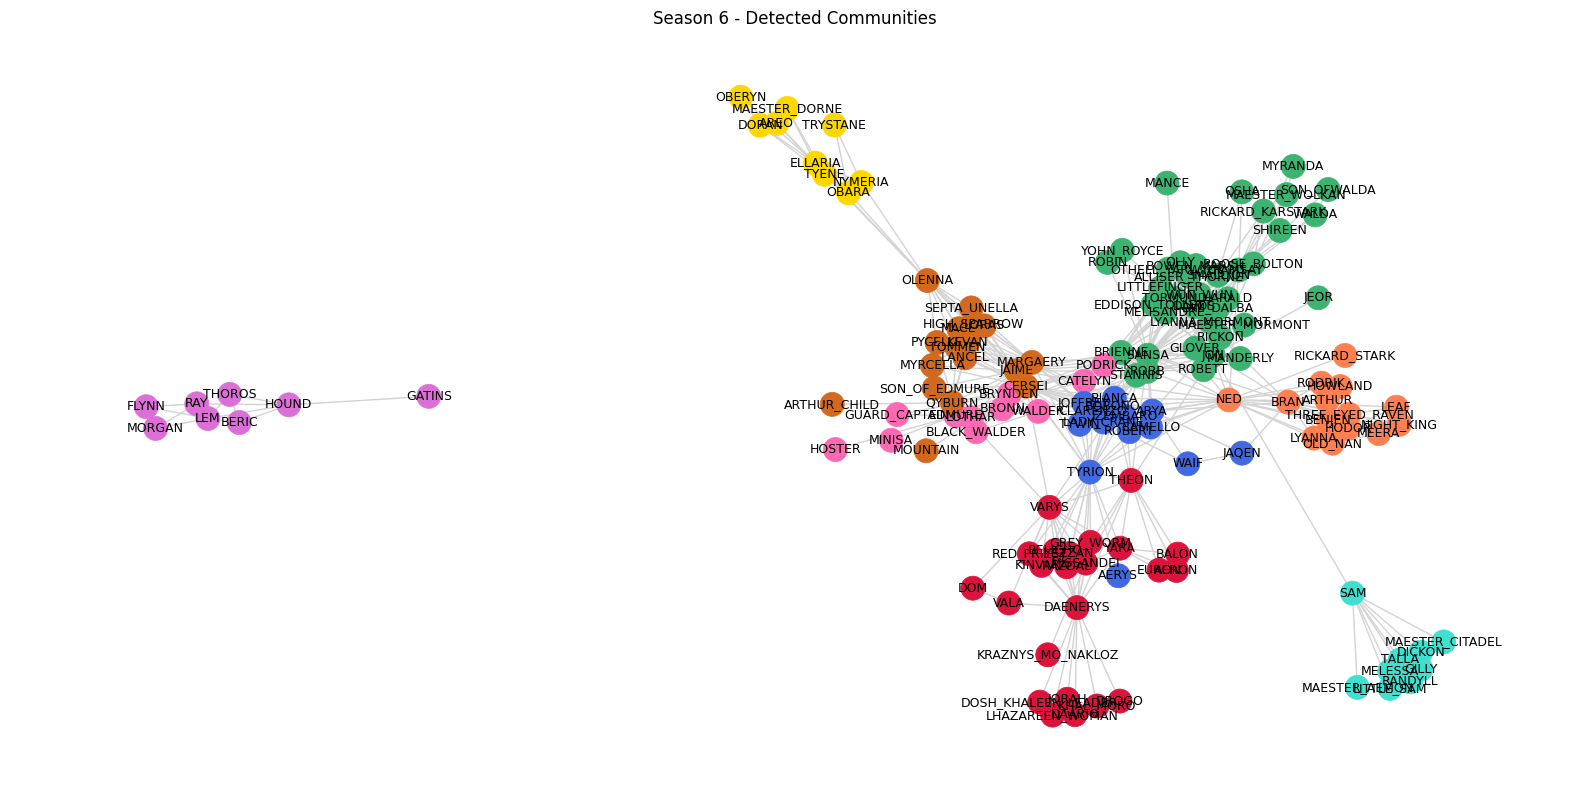



------------------------------------------------------------------Season 7---------------------------------------------------------------- 

Modularity:  0.31654727118484305
Communities:  ['Dragonstone', 'Winterfell', "King's Landing", 'Northen Expedition']
TP:  523 TN:  2187 FP:  228 FN:  302
Rand Index (RI):  0.8364197530864198
Precision:  0.6964047936085219
Recall:  0.6339393939393939


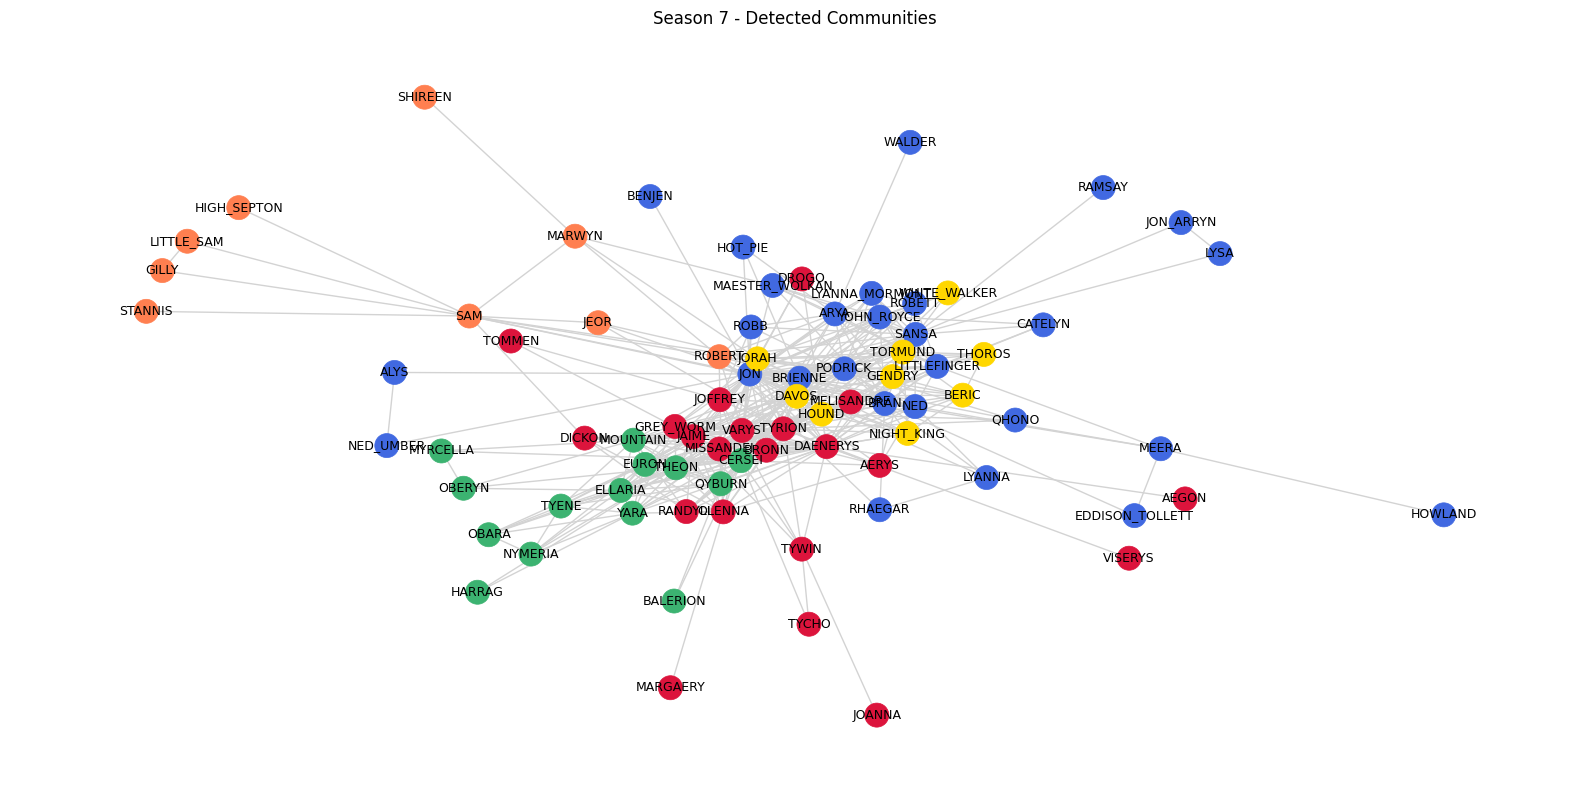



------------------------------------------------------------------Season 8---------------------------------------------------------------- 

Modularity:  0.2008753830005003
Communities:  ['Stark/Targaryen', 'Citizen pair 1', "King's Landing", 'Other', 'Citizen pair 2']
TP:  464 TN:  932 FP:  160 FN:  1145
Rand Index (RI):  0.5168456127360237
Precision:  0.7435897435897436
Recall:  0.28837787445618396


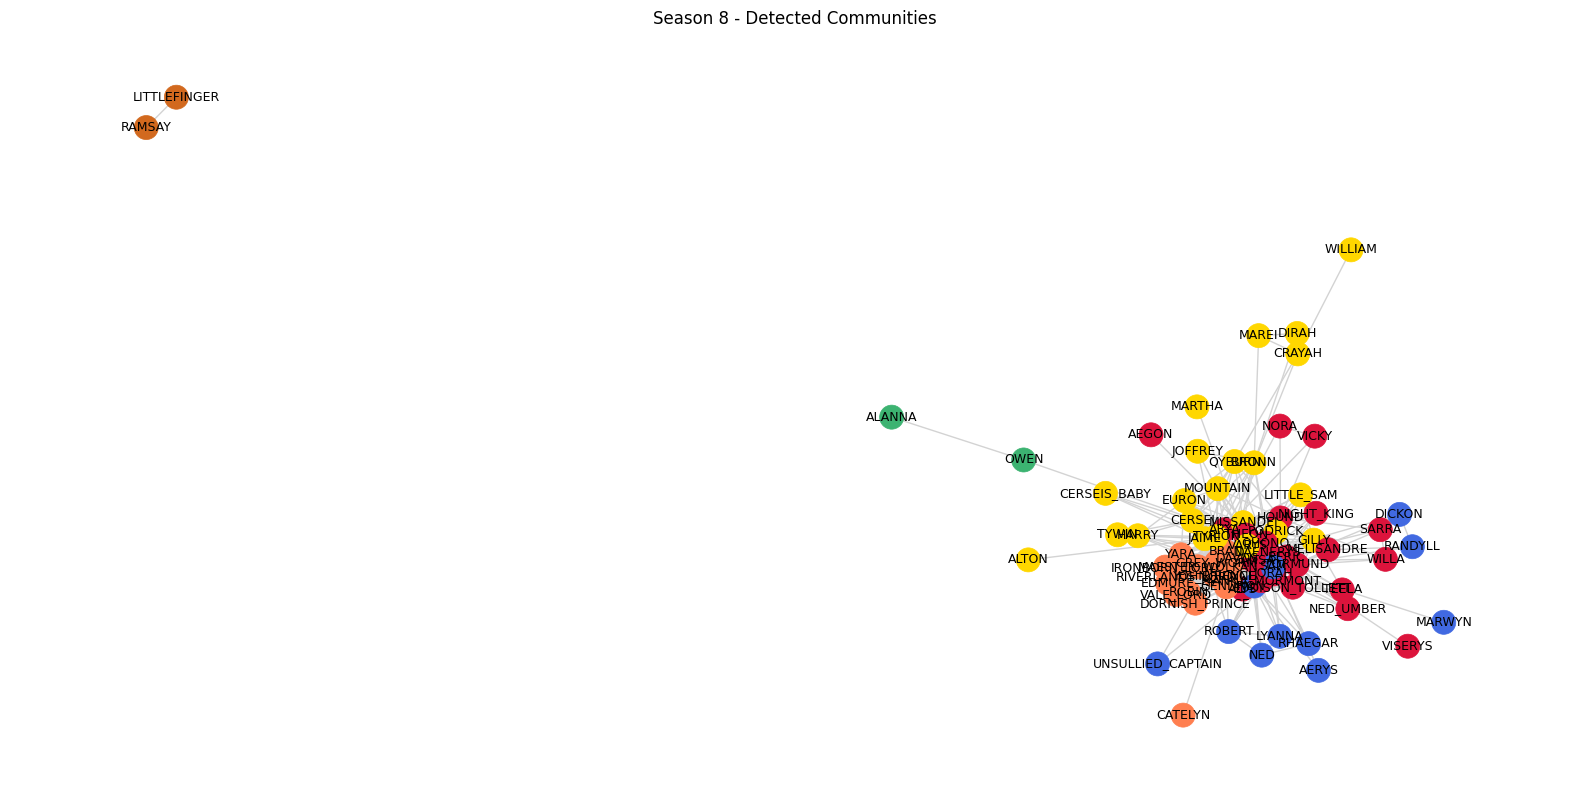

In [160]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

def calcul_index(graph, pred_labels, true_labels):
    nodes = list(graph.nodes())
    TP = TN = FP = FN = 0

    for i, j in combinations(nodes, 2):
        same_pred = pred_labels[i] == pred_labels[j]
        same_true = true_labels[i] == true_labels[j]
        if same_pred and same_true:
            TP += 1
        elif not same_pred and not same_true:
            TN += 1
        elif same_pred and not same_true:
            FP += 1
        elif not same_pred and same_true:
            FN += 1

    RI = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return RI, precision, recall, TP, TN, FP, FN

for season in range(1, 9):
    print("------------------------------------------------------------------Season {}---------------------------------------------------------------- \n".format(season))

    got_nodes = f"data/got-s{season}-nodes.csv"
    got_edges = f"data/got-s{season}-edges.csv"

    social_network = load_unweighted_network(got_nodes, got_edges)
    lpam = LPAmPlus(social_network)
    lpam.find_communities()

    nodes = lpam.graph.nodes
    true_labels_dict = nx.get_node_attributes(lpam.graph, 'ground_truth')
    pred_labels_dict = nx.get_node_attributes(lpam.graph, 'label')

    true_labels = true_labels_dict
    pred_labels = pred_labels_dict

    RI, precision, recall, TP, TN, FP, FN = calcul_index(lpam.graph, pred_labels, true_labels)

    print("Modularity: ", lpam.modularity())
    print("Communities: ", list(dict.fromkeys(true_labels.values())))
    print("TP: ", TP, "TN: ", TN, "FP: ", FP, "FN: ", FN )
    print("Rand Index (RI): ", RI)
    print("Precision: ", precision)
    print("Recall: ", recall)

    # --- Visualization ---
    color_choices = [
        "crimson",
        "royalblue",
        "mediumseagreen",
        "gold",
        "coral",
        "chocolate",
        "orchid",
        "hotpink",
        "turquoise",
        "darkorange",
        "limegreen",
        "deepskyblue",
        "magenta",
        "indianred"
    ]

    label_color = {}
    colors = []

    for node in nodes:
        label = pred_labels[node]
        if label not in label_color:
            if color_choices:
                label_color[label] = color_choices.pop(0)
            else:
                label_color[label] = "#%06x" % (hash(label) % 0xFFFFFF)  # fallback if too many labels
        colors.append(label_color[label])

    pos = nx.spring_layout(social_network, seed=42)
    plt.figure(figsize=(16, 8))
    nx.draw_networkx(
        social_network,
        pos,
        node_color=colors,
        node_size=300,
        font_size=9,
        edge_color='lightgray',
        font_color='black',
        linewidths=0.5
    )
    plt.title(f"Season {season} - Detected Communities")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("\n")


#### Analyse / Analysis

**Écrivez votre analyse ici**

**- L'algorithme performe-t-il bien sur toutes les saisons ou pour certaines seulement?**
- Pour les saisons 1 à 7, l’algorithme LPAm+ montre de bonnes performances, avec un score RI compris entre 0.90 et 0.98. Cela signifie que les résultats sont justes dans au moins 90 % des cas, ce qui est satisfaisant. En revanche, la saison 8 se distingue avec un score RI nettement plus bas, à seulement 0.53. Cela indique que l’algorithme est beaucoup moins performant pour cette saison.

**- Expliquez pourquoi vous avez obtenu ces résultats en analysant la formation des communautés dans chaque saison. Quelles particularités favorisent des bons résultats? Quelles particularités nuisent à l'algorithme?**
-  Les résultats s’expliquent par la formation des communautés à chaque saison. Un score Rand Index (RI) élevé indique des communautés bien définies et facilement visibles dans les graphes, avec beaucoup de liens internes et peu de liens externes. La modularité, qui mesure la séparation des communautés, confirme cela : une modularité élevée signifie des groupes distincts, tandis qu’une valeur faible, comme 0,20 en saison 8, indique des communautés moins nettes.
- Concernant les facteurs favorisant de bons résultats, nos observations montrent que l’algorithme LPAm+ fonctionne bien lorsque les clusters sont bien définis, c’est-à-dire avec de nombreux liens internes et peu de liens entre communautés.
- Les difficultés de l’algorithme apparaissent lorsque les communautés sont fortement interconnectées, c’est-à-dire quand les membres d’une même communauté ont beaucoup de liens avec le reste du réseau. Cela complique la séparation des groupes et augmente le nombre de faux négatifs (FN) et faux positifs (FP). C’est le cas en saison 8, où les personnages de différents clans interagissent beaucoup plus qu’au cours des autres saisons, où les communautés sont plus isolées.



# 2. Personnages influents dans GOT / Influent character in GOT (6 points)

##  Analyse d'un réseau social
Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau soit les personnes autour desquelles les gens du réseau se regroupent.

Il existe des mesures qui permettent de connaître ces personnes: les mesures de centralité. **Vous devez implémenter les mesures vous-même et ne pas utilisez les implémentations de `networkx` de ces mesures.** Pour vous aider lors de l'implémentation de ses mesures, un deuxième toy dataset vous est fourni. Il ressemble à ceci (data/picture2.png):
![title](data/picture2.png)

## GOT datasets
La série Games of Thrones est reconnue pour tuer ses personnages importants. Nous vous demandons de vérifier cette affirmation. Pour cette partie, vous devez utiliser tous les CSV donnés avec le TP (nodes, edges et deaths). Nous voulons que vous trouviez les personnages les plus influents de chaque saison et que vous les compariez avec la liste de personnages morts durant la saison.

---

##  Social network analysis

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use `networkx` implementation for the  tp.** To help you during the implementation of those measurements, a second toy dataset is provided to you. It looks like this (data/picture2.png): ![title](data/picture2.png)

## GOT datasets
The Games of Thrones series is known to kill its important characters. We ask you to verify this statement. For this part, you must use all the csv given with the TP (nodes, edges and deaths). We want you to find the most influential characters from each season and compare them with the list of dead characters during the season.


## 2.1 Centralité de degré / Degree centrality (1 point)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

Utilisez la fonction `test_degree_centrality` pour vérifier votre implémentation. Le sommet 1 devrait avoir la plus haute mesure de 0.4.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.

Use the function `test_degree_centrality` to verify your implementation. The best node should be node 1 with 0.4.

In [161]:
def calculate_degree_centrality(social_network):
    #TODO
    n = social_network.number_of_nodes()

    for node in social_network.nodes():
        voisins = list(social_network.neighbors(node))
        degre = len(voisins)
        centralite = degre / (n - 1)
        social_network.nodes[node]["degree_centrality"] = centralite

In [162]:
def test_degree_centrality():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    calculate_degree_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'degree_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest degree centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))
test_degree_centrality()

Highest degree centrality node: 1 with 0.400


## 2.2 Centralité de proximité / Closeness centrality (1 point)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

Utilisez la fonction `test_closeness_centrality` pour vérifier votre implémentation. Le sommet 7 devrait avoir la plus haute mesure de 0.577.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

Use the function `test_closeness_centrality` to verify your implementation. The best node should be node 7 with 0.577.

In [163]:
def calculate_closeness_centrality(graphe):
    #TODO
    n = graphe.number_of_nodes()

    for noeud in graphe.nodes():
        longueurs = nx.shortest_path_length(graphe, source=noeud)
        distance_totale = sum(longueurs.values())
        if distance_totale > 0:
            proximite = (n - 1) / distance_totale
        else:
            proximite = 0 #on prend en compte si noeud isole
        graphe.nodes[noeud]["closeness_centrality"] = proximite

In [164]:
def test_closeness_centrality():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    calculate_closeness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'closeness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest closeness centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))

test_closeness_centrality()

Highest closeness centrality node: 7 with 0.577


## 2.3 Centralité d'intermédiarité / Betweeness centrality (1 point)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: la proportion des chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

**NB**: Utilisez la fonction `all_shortest_paths()` de Networkx pour calculer tous les chemins simples les plus courts du graphe.

Utilisez la fonction `test_betweennes_centrality` pour vérifier votre implémentation. Le sommet 7 devrait avoir la plus haute mesure de 0.525.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the proportion of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

**NB**: Use the fucntion `all_shortest_paths()` from Networkx to compute all shortest simple paths in the graph.

Use the function `test_betweennes_centrality` to verify your implementation. The best node should be the node 7 with 0.525.


In [165]:
def calculate_betweenness_centrality(graphe):
    #TODO
    n = graphe.number_of_nodes()
    noeuds = list(graphe.nodes())
    for noeud in noeuds:
        graphe.nodes[noeud]["betweenness_centrality"] = 0

    for i in noeuds:
        score = 0
        autres = [x for x in noeuds if x != i]
        for j, k in itertools.combinations(autres, 2):
            try:
                chemins = list(nx.all_shortest_paths(graphe, source=j, target=k))
                total = len(chemins)

                if total == 0:
                    continue
                count = 0
                for chemin in chemins:
                    if i in chemin[1:-1]:
                        count += 1
                score += count / total
            except nx.NetworkXNoPath:
                continue
        normalisation = (n - 1) * (n - 2) / 2
        graphe.nodes[i]["betweenness_centrality"] = score / normalisation if normalisation > 0 else 0

In [166]:
def test_betweenness_centrality():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    calculate_betweenness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'betweenness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest betweenness centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))

test_betweenness_centrality()

Highest betweenness centrality node: 7 with 0.525


## 2.4 Analyse de vos résultats / Analysis of your results (3 points)

Executez les trois fonctions sur les réseaux de chaque saison et présentez le top 10 pour chaque mesure. **Les graphes des saisons 2, 4, 6 et 8 sont déconnectés. Dans ce cas, considérez la plus grande composante connexe**. Pour chaque saison, comparez le top 10 des mesures avec la liste de morts de la saison disponible dans les csv death. Répondez aux questions suivantes. Elles sont des pistes de réflexions pour votre analyse.

- Est-ce que le top 10 est suffisant pour trouver les morts importants de chaque saison?
- Quelle mesure semble mieux prédire les morts?
- Est-ce que la réputation de Games of Thrones de tuer plusieurs de ses personnages importants est fondée?

**N.B.:** Si vous ne connaissez pas la série et vous n'êtes pas sûrs quels morts peuvent être considérés importants, faites une recherche Google sur les personnages importants. Mentionnez votre démarche et la conclusion de vos recherches. Il n'y a pas une liste précise de morts importants. Évidemment si vous me dite que Daenerys n'est pas importante, je vais douter de vos recherches. Le but est de voir votre travail de réflexion et d'analyse des mesures de centralité.

---

Run the three functions on the networks of each season and present the top 10 for each metric. **The season 2, 4, 6 and 8 graphs are disconnected. In that case, consider the largest connected component**. For each season, compare the top 10 metrics with the season's death list in the death csv. Answer the following questions. They are guide for your analysis.

- Is the top 10 enough to find the significant deaths of each season?
- What measure seems to better predict the dead?
- Is the reputation of Games of Thrones for killing many important characters founded?

**N.B:** If you don't know the series and aren't sure which deaths are considered important, do a Google research on the important characters in the series. Metion your research and the conclusion of it. There isn't a precise list of important deaths but if you tell me that Daenerys isn't important, I will doubt of the seriousness of your research. The goal is to see how your analyse the results giving by centrality metrics.

### Résultats / Results

In [167]:
import os
import pandas as pd
# (assume calcul_index is already defined and itertools is imported)

def run_lpam_plus_on_seasons(base_path="/content/data", seasons=8):
    results = []

    for s in range(1, seasons + 1):
        try:
            node_file = os.path.join(base_path, f"got-s{s}-nodes.csv")
            edge_file = os.path.join(base_path, f"got-s{s}-edges.csv")

            # Charger les données
            G = load_unweighted_network(node_file, edge_file)
            nodes_df = pd.read_csv(node_file)
            ground_truth = dict(zip(nodes_df["Id"], nodes_df["Community"]))

            # Appliquer LPAm+
            lpam = LPAmPlus(G)
            lpam.find_communities()
            predicted_labels = {node: G.nodes[node]["label"] for node in G.nodes()}

            # Calculer le Rand Index (on n’utilise que le premier retour)
            ri, precision, recall, TP, TN, FP, FN = calcul_index(
                G,
                predicted_labels,
                ground_truth
            )
            modularity = lpam.modularity()
            nb_communities = len(set(predicted_labels.values()))

            results.append({
                "Saison": f"Saison {s}",
                "Rand Index": round(ri, 4),
                "Modularité": round(modularity, 4),
                "Nb Communautés": nb_communities
            })
        except Exception as e:
            results.append({
                "Saison": f"Saison {s}",
                "Rand Index": "Erreur",
                "Modularité": "Erreur",
                "Nb Communautés": "Erreur"
            })
            print(f"[ERREUR] Saison {s} : {e}")

    return pd.DataFrame(results)

# Ensuite, on affiche
df_results = run_lpam_plus_on_seasons()
print(df_results.to_string(index=False))


  Saison  Rand Index  Modularité  Nb Communautés
Saison 1      0.8912      0.4496               5
Saison 2      0.9700      0.5640               6
Saison 3      0.9471      0.6274               6
Saison 4      0.9143      0.6071               8
Saison 5      0.9808      0.6701               6
Saison 6      0.9512      0.6523               9
Saison 7      0.8546      0.3192               4
Saison 8      0.5235      0.2060               6


In [171]:
def analyze_centrality_and_deaths(base_path="/content/data", seasons=8):
    results = []

    for s in range(1, seasons + 1):
        try:
            node_file  = f"{base_path}/got-s{s}-nodes.csv"
            edge_file  = f"{base_path}/got-s{s}-edges.csv"
            death_file = f"{base_path}/got-s{s}-deaths.csv"

            # Load the graph (you must have a proper load_unweighted_network function)
            G = load_unweighted_network(node_file, edge_file)

            # If even season, keep only the largest connected component
            if s in [2, 4, 6, 8]:
                largest_cc = max(nx.connected_components(G), key=len)
                G = G.subgraph(largest_cc).copy()

            # Compute centrality measures
            calculate_degree_centrality(G)
            calculate_closeness_centrality(G)
            calculate_betweenness_centrality(G)

            # Load death data
            df_deaths = pd.read_csv(death_file)
            dead_ids = set(df_deaths["Id"])

            for measure in ["degree_centrality", "closeness_centrality", "betweenness_centrality"]:
                # Sort nodes by centrality measure
                sorted_nodes = sorted(
                    G.nodes(data=True),
                    key=lambda x: x[1][measure],
                    reverse=True
                )

                # Build top-10 list with status
                top_10 = []
                deaths_in_top10 = 0

                for n, d in sorted_nodes[:10]:
                    status = "Dead" if n in dead_ids else "Alive"
                    score = round(d[measure], 4)
                    if status == "Dead":
                        deaths_in_top10 += 1
                    top_10.append((n, score, status))

                results.append({
                    "Saison": f"Saison {s}",
                    "Mesure": measure,
                    "Top 10 (node, score, status)": top_10,
                    "Morts dans top 10": deaths_in_top10
                })

        except Exception as e:
            print(f"[ERREUR] Saison {s} : {e}")
            results.append({
                "Saison": f"Saison {s}",
                "Mesure": "Erreur",
                "Top 10 (node, score, status)": [],
                "Morts dans top 10": "Erreur"
            })

    df_result = pd.DataFrame(results)
    pd.set_option('display.max_colwidth', None)
    print(df_result.to_string(index=False))
    return df_result


# Lance la fonction
analyze_centrality_and_deaths()


  Saison                 Mesure                                                                                                                                                                                                                                   Top 10 (node, score, status)  Morts dans top 10
Saison 1      degree_centrality                    [(NED, 0.456, Dead), (TYRION, 0.328, Alive), (CATELYN, 0.288, Alive), (ROBERT, 0.288, Dead), (ROBB, 0.24, Alive), (CERSEI, 0.232, Alive), (ARYA, 0.224, Alive), (JOFFREY, 0.216, Alive), (JON, 0.208, Alive), (LITTLEFINGER, 0.208, Alive)]                  2
Saison 1   closeness_centrality                  [(NED, 0.6281, Dead), (ROBERT, 0.5531, Dead), (CATELYN, 0.5507, Alive), (TYRION, 0.5435, Alive), (JON, 0.5187, Alive), (ROBB, 0.5123, Alive), (JOFFREY, 0.5102, Alive), (CERSEI, 0.5081, Alive), (ARYA, 0.502, Alive), (JAIME, 0.498, Alive)]                  2
Saison 1 betweenness_centrality                      [(NED, 0.3033, Dead), (TYRION

,Saison,Mesure,"Top 10 (node, score, status)",Morts dans top 10
0,Saison 1,degree_centrality,"[(NED, 0.456, Dead), (TYRION, 0.328, Alive), (CATELYN, 0.288, Alive), (ROBERT, 0.288, Dead), (ROBB, 0.24, Alive), (CERSEI, 0.232, Alive), (ARYA, 0.224, Alive), (JOFFREY, 0.216, Alive), (JON, 0.208, Alive), (LITTLEFINGER, 0.208, Alive)]",2
1,Saison 1,closeness_centrality,"[(NED, 0.6281, Dead), (ROBERT, 0.5531, Dead), (CATELYN, 0.5507, Alive), (TYRION, 0.5435, Alive), (JON, 0.5187, Alive), (ROBB, 0.5123, Alive), (JOFFREY, 0.5102, Alive), (CERSEI, 0.5081, Alive), (ARYA, 0.502, Alive), (JAIME, 0.498, Alive)]",2
2,Saison 1,betweenness_centrality,"[(NED, 0.3033, Dead), (TYRION, 0.163, Alive), (CATELYN, 0.1183, Alive), (ROBERT, 0.1104, Dead), (DAENERYS, 0.1014, Alive), (JON, 0.0853, Alive), (ROBB, 0.08, Alive), (ARYA, 0.066, Alive), (PYP, 0.0609, Alive), (JORAH, 0.0539, Alive)]",2
3,Saison 2,degree_centrality,"[(JOFFREY, 0.3158, Alive), (TYRION, 0.2895, Alive), (CERSEI, 0.2719, Alive), (ROBB, 0.2456, Alive), (ARYA, 0.2368, Alive), (TYWIN, 0.2193, Alive), (CATELYN, 0.2018, Alive), (STANNIS, 0.193, Alive), (LITTLEFINGER, 0.1754, Alive), (NED, 0.1754, Alive)]",0
4,Saison 2,closeness_centrality,"[(JOFFREY, 0.5352, Alive), (TYRION, 0.5352, Alive), (NED, 0.5182, Alive), (ROBB, 0.5067, Alive), (CERSEI, 0.5022, Alive), (CATELYN, 0.4978, Alive), (ARYA, 0.4831, Alive), (LITTLEFINGER, 0.481, Alive), (SANSA, 0.481, Alive), (TYWIN, 0.479, Alive)]",0
5,Saison 2,betweenness_centrality,"[(ARYA, 0.1906, Alive), (TYRION, 0.178, Alive), (ROBB, 0.1477, Alive), (JON, 0.1399, Alive), (NED, 0.1316, Alive), (JOFFREY, 0.1268, Alive), (THEON, 0.108, Alive), (CATELYN, 0.0823, Alive), (TYWIN, 0.0816, Alive), (CERSEI, 0.0772, Alive)]",0
6,Saison 3,degree_centrality,"[(ROBB, 0.2541, Dead), (TYWIN, 0.2377, Alive), (TYRION, 0.2049, Alive), (CATELYN, 0.1721, Dead), (JOFFREY, 0.1721, Alive), (CERSEI, 0.1639, Alive), (JON, 0.1557, Alive), (SANSA, 0.1557, Alive), (ROOSE_BOLTON, 0.1475, Alive), (BRAN, 0.1393, Alive)]",2
7,Saison 3,closeness_centrality,"[(ROBB, 0.4784, Dead), (NED, 0.4552, Alive), (CATELYN, 0.4502, Dead), (TYWIN, 0.4485, Alive), (JOFFREY, 0.4251, Alive), (JAIME, 0.4164, Alive), (TYRION, 0.4164, Alive), (BRAN, 0.4122, Alive), (STANNIS, 0.408, Alive), (SANSA, 0.4067, Alive)]",2
8,Saison 3,betweenness_centrality,"[(ROBB, 0.2408, Dead), (NED, 0.1764, Alive), (ROBERT, 0.1625, Alive), (BRAN, 0.1503, Alive), (JON, 0.1378, Alive), (TYWIN, 0.1285, Alive), (CATELYN, 0.1138, Dead), (SAM, 0.1028, Alive), (TYRION, 0.0985, Alive), (STANNIS, 0.0777, Alive)]",2
9,Saison 4,degree_centrality,"[(JOFFREY, 0.2395, Dead), (TYRION, 0.2275, Alive), (CERSEI, 0.1976, Alive), (JON, 0.1796, Alive), (SANSA, 0.1796, Alive), (JAIME, 0.1737, Alive), (TYWIN, 0.1677, Dead), (OBERYN, 0.1497, Dead), (SAM, 0.1497, Alive), (ARYA, 0.1437, Alive)]",3


### Analyse / Analysis

**Écrivez votre analyse ici/Write down your analysis here**


Nous avons appliqué les trois mesures de centralité (degré, proximité, intermédiarité) sur les réseaux de personnages de Game of Thrones pour chaque saison (1 à 8). Pour les saisons déconnectées (2, 4, 6 et 8), seule la plus grande composante connexe a été analysée, conformément aux consignes. Nous avons extrait le top 10 des personnages pour chaque mesure, puis comparé cette liste aux personnages morts durant la saison correspondante (selon les fichiers got-sX-deaths.csv).

**- Est-ce que le top 10 est suffisant pour trouver les morts importants de chaque saison?**

- En analysant les tableaux, on observe que le nombre de morts présentes dans le top 10 varie entre 0 et 3 selon les saisons et les mesures. Cela indique que les mesures de centralité, limitées à un top 10, ne permettent pas de couvrir l’ensemble des morts importantes de chaque saison. Par exemple, la saison 6 compte plus de 500 morts, dont au moins 25 considérées comme majeures, comme High Sparrow, Hodor ou Loras Tyrell, alors que seulement 1 ou 2 sont détectées selon les mesures. De même, dans la saison 7, des personnages clés comme Olenna Tyrell et Petyr Baelish meurent, mais ils n’apparaissent pas toujours dans le top 10, selon la mesure utilisée.

- Cela peut etre expliquer par le fait que Game of Thrones a un très grand nombre de personnages principaux ce qui rend un top 10 insuffisant pour une bonne couverture. Cependant, lorsqu’un personnage décédé figure dans le top 10 d’une mesure, il s’agit toujours d’une mort importante et centrale dans la narration, comme Ned, Joffrey, Stannis ou Daenerys. En résumé, ces mesures sont capables de détecter les morts les plus marquantes, mais passent à côté d’un grand nombre de morts significatives, **ce qui montre l’intérêt d’étendre l’analyse à un top 20 ou top 50 pour obtenir une vue plus complète.**


- **An illustrated guide to all 6,887 deaths in ‘Game of Thrones’:** https://www.washingtonpost.com/graphics/entertainment/game-of-thrones/#season-one

**- Quelle mesure semble mieux prédire les morts?**

- Les trois mesures de centralité donnent des résultats globalement similaires en ce qui concerne les morts prédits, avec une légère exception pour le degree de centralité. Pour les saisons 1, 2, 3 et 7, les résultats sont identiques entre les mesures, tandis que des différences apparaissent dans les saisons 4, 5, 6 et 8, probablement à cause de l’utilisation de la plus grande composante connexe, une simplification du réseau. Le degree de centralité se distingue comme la mesure la plus rapide, stable et légèrement plus efficace. La Centralité d'intermédiarité , bien que plus lente, met en avant des personnages stratégiques. La Centralité de proximité , quant à elle, s’avère plus variable et parfois moins liée aux morts importantes.
Ainsi, le **degree de centralité** semble être le meilleur choix pour sa performance et sa fiabilité.


**- Est-ce que la réputation de Games of Thrones de tuer plusieurs de ses personnages importants est fondée?**

- Oui, la réputation de Game of Thrones de tuer plusieurs de ses personnages importants est fondée. D’après l’analyse des mesures de centralité, on observe que dans plusieurs saisons, notamment les saisons 1, 3, 4, 5 et 8, au moins un des personnages les plus centraux (souvent parmi les 4 premiers du réseau) meurt. Même si les top 10 des mesures ne capturent pas tous les décès majeurs, les morts qu’on y retrouve sont systématiquement des figures clés de la série, comme Ned, Joffrey, Stannis ou Daenerys. Cela montre une tendance claire à faire disparaître des personnages centraux au fil des saisons, ce qui renforce l’idée que Game of Thrones se distingue par sa volonté de surprendre et de choquer en éliminant régulièrement ses protagonistes les plus importants.